# TensorFlow 2.x Basics

TensorFlow는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리입니다.

TensorFlow와 Keras는 모두 약 4년전쯤 릴리즈 되었습니다 (Keras는 2015년 3월, TensorFlow는 2015년 11월). 이는 딥러닝 세계의 관점에서 볼 때, 꽤 오랜시간이라고 볼 수 있습니다!

과거에 TensorFlow 1.x + Keras는 여러가지 알려진 문제점을 가지고 있었습니다:
- TensorFlow를 사용한다는것은 정적인 계산 그래프를 조작함을 의미하는것으로, Imperative 코딩 스타일을 사용하는 프로그래머로 하여금 어렵고, 불편한 느낌을 받게 했었습니다.
- TensorFlow API가 매우 강력하면서도 유연하지만, 빠른 코드의 작성의 가능성이 결여되어 있었으며 종종 사용법은 어렵고 혼란스러웠습니다.
- Keras는 매우 생산적이고 사용이 쉽지만, 연구에 사용된 사례에서 종종 유연성이 결여되었었습니다.

### TensorFlow 2.0은 TensorFlow와 Keras를 대대적으로 새로이 디자인한 것으로, 지난 4년간의 사용자 피드백과 기술의 진보가 모두 고려되었습니다. 위에서 언급된 문제점들을 대규모로 수정합니다.

TensorFlow 2.0은 아래와 같은 주요 아이디어에 기반하고 있습니다:

- 사용자들이 계산을 eager mode로 수행할 수 있게 해줍니다. 이는 Numpy를 사용하는법과 유사하며, TensorFlow 2.0을 이용한 프로그래밍이 직관적이며 동시에 pythonic할 수 있게끔 해 줍니다.
- 1.x에서의 컴파일된 그래프의 엄청난 이점을 그대로 보존하는데, 이는 성능, 분산, 그리고 배포를 위함입니다. 이 내용은 TensorFlow를 빠르고, 분산 구조에서의 확장 가능하며, 상용화에 준비될 수 있도록 해 줍니다.
- Keras를 딥러닝의 고수준 API로 채택하여, TensorFlow를 이해하기 쉬우면서도 높은 생산성을 가질 수 있게 만들어 줍니다.
- 매우 고수준(더 쉬운 사용성, 약간 부족한 유연성) 에서부터 매우 저수준(더 깊은 전문성, 매우 뛰어난 유연성)의 다양한 범위의 작업으로까지 Keras를 확장합니다.

In [1]:
## Google Colab에서 TensorFlow 2.x 버전을 사용하기 위해서는 아래 magic command를 수행하면 간편하게 할 수 있습니다

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
## TensorFlow library는 아래와 같이 import 합니다
import tensorflow as tf

In [0]:
## TensorFlow와 함께 많이 쓰이는 numpy library는 아래와 같이 import 합니다
import numpy as np

In [0]:
## TensorFlow 내부에는 TensorFlow를 쉽고 편하게 쓸 수 있게 해주는 high-level framework인 Keras가 포함되어 있습니다.
from tensorflow import keras

In [5]:
## TensorFlow와 Keras의 version을 확인해봅시다
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


## TensorFlow의 기본

### Tensors(텐서)

Tensor는 multi-dimensional array를 나타내는 말로, TensorFlow의 기본 data type입니다

In [6]:
## Hello World
hello = tf.constant("Hello World")
print(hello)

tf.Tensor(b'Hello World', shape=(), dtype=string)


In [7]:
## 상수형 tensor는 아래와 같이 만들 수 있습니다
## 출력해보면 tensor의 값과 함께, shape과 내부의 data type을 함께 볼 수 있습니다
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [8]:
## 아래와 같이 numpy ndarray나 python의 list도 tensor로 바꿀 수 있습니다
x_np = np.array([[1.0, 2.0],
                [3.0, 4.0]])
x_list = [[1.0, 2.0], 
         [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [9]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [10]:
## 맨 처음에 생성한 tensor의 type도 동일합니다
print(type(x))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
## 반대로 tensor를 다음과 같이 numpy ndarray로 바꿀 수도 있습니다
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [12]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [13]:
## Tensor는 numpy ndarray와 마찬가지로 dtype과 shape이라는 속성을 가지고 있습니다
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'float32'>
shape: (2, 2)


In [14]:
## 상수형 tensor를 생성하는 방법으로 아래와 같은 방법이 많이 사용됩니다
print(tf.ones(shape=(2,2)))
print(tf.zeros(shape=(2,2)))

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [15]:
## tensor끼리의 4칙 연산은 element-wise 연산을 기본으로 합니다
a = tf.ones((2,2))*2
b = tf.ones((2,2))*6
print (a.numpy())
print (b.numpy())

## 덧셈
print ("덧셈")
print (tf.add(a, b).numpy())
print ((a + b).numpy())

## 뺄셈
print ("뺄셈")
print (tf.subtract(b, a).numpy())
print ((b - a).numpy())

## 곱셈
print ("곱셈")
print (tf.multiply(a, b).numpy())
print ((a * b).numpy())

## 나눗셈
print ("나눗셈")
print (tf.divide(b, a).numpy())
print ((b / a).numpy())

[[2. 2.]
 [2. 2.]]
[[6. 6.]
 [6. 6.]]
덧셈
[[8. 8.]
 [8. 8.]]
[[8. 8.]
 [8. 8.]]
뺄셈
[[4. 4.]
 [4. 4.]]
[[4. 4.]
 [4. 4.]]
곱셈
[[12. 12.]
 [12. 12.]]
[[12. 12.]
 [12. 12.]]
나눗셈
[[3. 3.]
 [3. 3.]]
[[3. 3.]
 [3. 3.]]


In [16]:
## Tensor와 numpy ndarray는 많은 경우에 자동으로 호환됩니다
ndarray = np.ones((3, 3))
print(ndarray)

## Tensor연산에 입력으로 tensor가 아닌 ndarray가 입력으로 들어갈 수 있습니다
print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 10)
print(tensor)

## numpy ndarray연산에 입력으로 tensor가 들어갈 수도 있습니다
print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[12. 12. 12.]
 [12. 12. 12.]
 [12. 12. 12.]]


In [17]:
## Random한 상수형 tensor는 다음과 같이 만들 수 있습니다
## 아래는 표준정규분포로부터 상수를 생성합니다

tf.random.normal(shape=(2,2), mean=0., stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.1689512 ,  1.0414386 ],
       [-0.6015349 ,  0.08927117]], dtype=float32)>

In [18]:
## 아래는 균등(uniform)분포로부터 random 상수를 생성합니다
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 7],
       [9, 6]], dtype=int32)>

### Variables (변수)
[Variables](https://www.tensorflow.org/guide/variable)는 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서 입니다. 

우리는 대부분의 경우에 우리가 학습해야하는 가중치(weight, parameter)들을 variable로 생성합니다.

In [19]:
## 초기값을 사용해서 Variable을 생성할 수 있습니다
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.2265795 , -0.15340361],
       [-0.8510924 ,  0.42490998]], dtype=float32)>


In [20]:
## 아래와 같이 variable을 초기화해주는 initializer들을 사용할 수도 있습니다
weight = tf.Variable(tf.random_normal_initializer(stddev=0.1)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.02037442,  0.0016904 ],
       [-0.11609089,  0.1267439 ]], dtype=float32)>


In [21]:
## variable은 `.assign(value)`, `.assign_add(increment)`, 또는 `.assign_sub(decrement)`
## 와 같은 메소드를 사용해서 Variable의 값을 갱신합니다:'''

new_value = tf.random.normal(shape=(2,2))
print(new_value)
weight.assign(new_value)
print(weight)

tf.Tensor(
[[ 1.2547858  -0.83194244]
 [-0.18560724 -0.0823747 ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.2547858 , -0.83194244],
       [-0.18560724, -0.0823747 ]], dtype=float32)>


In [22]:
added_value = tf.ones(shape=(2,2))
weight.assign_add(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2.2547858 , 0.16805756],
       [0.81439275, 0.9176253 ]], dtype=float32)>


### Watch out tensor's shape & broadcasting

Deep Learning에서는 많은 경우에 고차원의 tensor를 사용하게 되고, 따라서 shape에 주의하여야 합니다

특히 broadcasting은 잘 사용하면 매우 유용하지만, 정확히 이해하고 사용해야합니다

In [23]:
## Shape??
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
                  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]])
print(t.shape)

(1, 2, 3, 4)


In [24]:
## Broadcasting
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

print(matrix1)
print(matrix2)

tf.Tensor([[3. 3.]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[2.]
 [2.]], shape=(2, 1), dtype=float32)


In [25]:
print(matrix1+matrix2)
print(matrix1-matrix2)
print(matrix1*matrix2)
print(matrix1/matrix2)

tf.Tensor(
[[5. 5.]
 [5. 5.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.5 1.5]
 [1.5 1.5]], shape=(2, 2), dtype=float32)


#### Broadcasting 규칙

두 개의 배열을 브로드캐스팅하는 것은 다음 규칙을 따릅니다.

1. 배열의 랭크가 같지 않으면 두 모양이 같은 길이가 될 때까지 배열의 낮은 랭크쪽에 1을 붙입니다.
2. 두 배열은 차원에서 크기가 같거나 배열 중 하나의 차원에 크기가 1 인 경우 차원에서 호환 가능하다고 합니다.
3. 배열은 모든 차원에서 호환되면 함께 브로드캐스트 될 수 있습니다.
4. 브로드캐스트 후 각 배열은 두 개의 입력 배열의 요소 모양 최대 개수와 동일한 모양을 가진 것처럼 동작합니다.
5. 한 배열의 크기가 1이고 다른 배열의 크기가 1보다 큰 차원에서 첫 번째 배열은 마치 해당 차원을 따라 복사 된 것처럼 작동합니다

실제로 동작하는 방식을 생각해 봅시다.

1. A와 B의 모양을 생각합니다.
2. 두 배열이 len(A.shape) == len(B.shape)인지 확인을 합니다.
3. 같지 않은 경우에는 두 배열의 모양 길이가 같아질때까지 적은 쪽의 shape 앞에 1 을 추가해 줍니다.
- 예: (5,3)–>(1,5,3)
4. shape이 1인 곳은 복사가 됩니다.
- 예: shape의 변화는 아래와 같게 될겁니다.
- (5, 3)+(3,)
- (5, 3)+(1, 3)
- (5, 3) + (5, 3)
- (5, 3)

### Tensor Operations

#### Indexing, Slicing

In [26]:
x = tf.constant([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(x)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [27]:
## indexing - indexing을 사용하면 항상 차원이 감소합니다
print(x[0])
print(x[1])
print(x[2])
print(x[0, 1])
print(x[1, 2])
print(x[2, 3])

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor([ 9 10 11 12], shape=(4,), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)


In [28]:
## slicing
print(x[1:3, 1:3])
print(x[:2, 1:3])
print(x[1:3, 3:])

tf.Tensor(
[[ 6  7]
 [10 11]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 8]
 [12]], shape=(2, 1), dtype=int32)


#### Reshape, Expend_dims

In [29]:
t = tf.constant([[[0, 1, 2], 
                [3, 4, 5]],              
               [[6, 7, 8], 
                [9, 10, 11]]])
print(t.shape)

(2, 2, 3)


In [30]:
print(tf.reshape(t, shape=[-1, 3]))

tf.Tensor(
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]], shape=(4, 3), dtype=int32)


In [31]:
print(tf.reshape(t, shape=[-1, 1, 3]))

tf.Tensor(
[[[ 0  1  2]]

 [[ 3  4  5]]

 [[ 6  7  8]]

 [[ 9 10 11]]], shape=(4, 1, 3), dtype=int32)


In [32]:
x = tf.constant([0, 1, 2])
print(x.shape)

(3,)


In [33]:
print(tf.expand_dims(x, axis=0))
print(tf.expand_dims(x, axis=1))

tf.Tensor([[0 1 2]], shape=(1, 3), dtype=int32)
tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int32)


#### Reduce Mean/Sum

In [34]:
x = tf.constant([[1., 2.],
                [3., 4.]])

print(tf.reduce_mean(x))

tf.Tensor(2.5, shape=(), dtype=float32)


In [35]:
print(tf.reduce_mean(x, axis=0))

tf.Tensor([2. 3.], shape=(2,), dtype=float32)


In [36]:
print(tf.reduce_mean(x, axis=1))

tf.Tensor([1.5 3.5], shape=(2,), dtype=float32)


In [37]:
print(tf.reduce_mean(x, axis=-1))

tf.Tensor([1.5 3.5], shape=(2,), dtype=float32)


여기서 축(axis)은 각 배열의 차원에 해당되는 인덱스입니다. 위의 예를 설명하면

- x.shape 은 (2, 2) 입니다.
- tf.reduce_mean(x, axis=0) 은
- x.shape[axis]: x.shape[0] 에 대하여 연산을 하라는 의미
입니다.

X.shape == (5, 3, 2) 인 경우를 생각해봅시다. 이 경우 tf.reduce_mean(X, axis=1) 의 결과값은

1. X.shape[axis] => X.shape[1] 에 대해서 연산을 하기 때문에
2. tf.reduce_mean(X, axis=1).shape 은 (5, 3, 2) -> (5, 2) 가 됩니다.

In [38]:
print(tf.reduce_sum(x))

tf.Tensor(10.0, shape=(), dtype=float32)


In [39]:
print(tf.reduce_sum(x, axis=0))

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [40]:
print(tf.reduce_sum(x, axis=-1))

tf.Tensor([3. 7.], shape=(2,), dtype=float32)


In [41]:
print(tf.reduce_mean(tf.reduce_sum(x, axis=-1)))

tf.Tensor(5.0, shape=(), dtype=float32)


In [42]:
print(t)

tf.Tensor(
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]], shape=(2, 2, 3), dtype=int32)


In [43]:
print(tf.reduce_sum(t, axis=0))
print(tf.reduce_sum(t, axis=1))
print(tf.reduce_sum(t, axis=-1))

tf.Tensor(
[[ 6  8 10]
 [12 14 16]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 3  5  7]
 [15 17 19]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 3 12]
 [21 30]], shape=(2, 2), dtype=int32)


#### Argmax

In [44]:
x = [[0, 1, 2],
     [2, 1, 0]]
print(tf.argmax(x, axis=0))

tf.Tensor([1 0 0], shape=(3,), dtype=int64)


In [45]:
print(tf.argmax(x, axis=1))

tf.Tensor([2 0], shape=(2,), dtype=int64)


In [46]:
print(tf.argmax(x, axis=-1))

tf.Tensor([2 0], shape=(2,), dtype=int64)


#### One-hot Encoding

In [47]:
label = tf.constant([0, 1, 2, 0])
onehot1 = tf.one_hot(label, depth=3)
onehot2 = keras.utils.to_categorical(label, num_classes=3)

print(onehot1, type(onehot1))
print(onehot2, type(onehot2))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]], shape=(4, 3), dtype=float32) <class 'tensorflow.python.framework.ops.EagerTensor'>
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] <class 'numpy.ndarray'>


#### Type Casting

In [48]:
print(tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32))

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)


In [49]:
print(tf.cast([True, False, 1 == 1, 0 == 1], tf.int32))

tf.Tensor([1 0 1 0], shape=(4,), dtype=int32)


### tf.data를 이용하여 Dataset 만들기

TensorFlow를 이용하여 deep learning model을 학습할 때, input data 및 label을 공급해주기 위하여 tf.data.Dataset을 이용합니다.

In [50]:
## 0에서 9까지 정수가 input data라고 가정해봅시다
a = np.arange(10)
print(a)

## dataset은 아래와 같이 만들 수 있습니다
ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

## dataset에서 앞 5개 data를 꺼내서 확인해보겠습니다
data = ds_tensors.take(5)
for x in data:
    print (x)

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


In [0]:
## dataset 내의 각 data에 함수를 적용하기 위해서는 아래와 같이 map을 사용합니다
## 이는 data 전처리에 많이 사용됩니다
## 또한 data를 섞어주는 shuffle과 batch size만큼 data를 꺼내주는 batch도 사용할 수 있습니다

ds_tensors = ds_tensors.map(tf.square).shuffle(20).batch(2)

In [52]:
## 실제 data를 꺼내서 사용할 때는 아래와 같이 for문에 dataset을 넣어주면 됩니다.
print('Elements of ds_tensors:')
for _ in range(3):
    for x in ds_tensors:
        print(x)

Elements of ds_tensors:
tf.Tensor([49 36], shape=(2,), dtype=int64)
tf.Tensor([ 0 81], shape=(2,), dtype=int64)
tf.Tensor([ 1 16], shape=(2,), dtype=int64)
tf.Tensor([ 4 64], shape=(2,), dtype=int64)
tf.Tensor([ 9 25], shape=(2,), dtype=int64)
tf.Tensor([36 64], shape=(2,), dtype=int64)
tf.Tensor([ 1 49], shape=(2,), dtype=int64)
tf.Tensor([25  4], shape=(2,), dtype=int64)
tf.Tensor([9 0], shape=(2,), dtype=int64)
tf.Tensor([16 81], shape=(2,), dtype=int64)
tf.Tensor([16  1], shape=(2,), dtype=int64)
tf.Tensor([64 36], shape=(2,), dtype=int64)
tf.Tensor([25  9], shape=(2,), dtype=int64)
tf.Tensor([49  0], shape=(2,), dtype=int64)
tf.Tensor([ 4 81], shape=(2,), dtype=int64)


### TensorFlow를 이용하여 자동미분 계산하기

Deep learning model을 학습시키기 위해서는 gradient descent 방법을 사용하고, 이를 위해서는 gradient 즉 미분을 계산해야 합니다.
(Loss 를 weight로 미분)

TensorFlow에서 자동으로 미분을 계산하는 방법을 알아보겠습니다

TensorFlow는 자동 미분을 위한 tf.GradientTape API를 제공합니다. 

tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프(tape)에 "기록"합니다. 

그 다음 TensorFlow는 후진 방식 자동 미분(reverse mode differentiation)을 사용해 테이프에 "기록된" 연산의 그래디언트를 계산합니다.

In [53]:
## GradientTape를 열게되면, 그때부턴 tape.watch()를 통해 tensor를 확인하고, 
## 이 tensor를 입력으로써 사용하는 미분을 자동으로 계산하는것이 가능합니다.
x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)    
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# 입력 텐서 x에 대한 z의 미분
dz_dx = t.gradient(z, x)
print(dz_dx)

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [54]:
## 기본적으로 Variable들은 자동으로 watch가 적용되어 있기 때문에, 수동으로 `watch`를 해 줄 필요는 없습니다.
x = tf.Variable(x)
with tf.GradientTape() as t:   
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# 입력 텐서 x에 대한 z의 미분
dz_dx = t.gradient(z, x)
print(dz_dx)

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


## End-to-End 예제: 선형 회귀

가장 간단한 model중 하나인 선형 회귀(linear regression) 모델을 만들고 학습을 해보겠습니다

In [0]:
## Library import
import matplotlib.pyplot as plt

In [0]:
## For reproducibility
np.random.seed(777)
tf.random.set_seed(777)

In [0]:
## Input data 생성
## y = 1 * x + 2를 따르는 noisy한 data를 100개 생성함

## inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

## ground truth
# 기울기
slopes = 1
# 절편에 noise 추가
intercept = np.random.normal(2, 0.2, 100).astype(np.float32)

## outputs
y = x * slopes + intercept

In [58]:
print(slopes)

1


In [59]:
print(intercept)

[1.9063582 1.835435  1.9869239 1.8573276 2.1812701 2.1532474 2.1652107
 1.7352635 1.6495111 2.2004898 2.1089618 2.3790321 1.8461285 1.7193809
 1.8735065 1.8882253 1.7533537 1.9120992 2.1829574 2.053008  1.723326
 2.1371024 2.0912182 1.9077251 2.01894   1.6914377 2.495874  2.0913734
 1.9372255 2.0042074 2.1921587 2.0116966 1.9107935 2.0638394 2.1682336
 1.6934476 1.9436831 2.3488905 1.8651522 2.1176803 2.3608727 2.41125
 2.2909164 1.9723177 2.0685744 1.8544763 1.7192107 1.7518778 1.9113035
 1.990535  2.151537  1.9695828 1.9457442 1.8800321 1.5946192 2.0660684
 1.9338338 1.9930116 2.0579495 1.878746  1.9463191 2.2382956 2.0315228
 2.2349648 2.264182  1.8303926 2.1491416 1.9376757 1.7897869 1.7847006
 2.090122  2.0817482 1.7140917 2.2034855 1.9836458 1.9232163 1.9523549
 2.0017576 2.1040938 2.080741  1.9196435 1.860551  2.1291966 1.9448934
 1.924158  2.393607  2.0404994 2.0745394 2.1962693 2.1472924 2.2822602
 1.9746964 2.1106315 1.8368928 2.1077404 1.556441  1.8187416 1.7075751
 1.864487

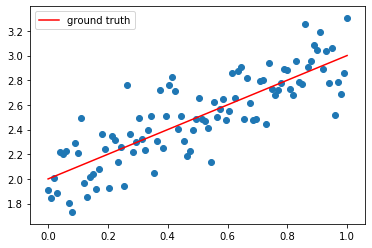

In [60]:
## 만들어진 data와 ground truth 확인
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

In [61]:
## input data type 확인
x.dtype

dtype('float32')

In [62]:
## label type 확인
y.dtype

dtype('float32')

In [63]:
## input data shape 확인
x.shape

(100,)

In [64]:
## label shape 확인
y.shape

(100,)

In [0]:
## Dataset 만들기
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=100).batch(50)

In [0]:
## Weight와 bias 만들기
w = tf.Variable(.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
# learning rate
learning_rate = 0.1

In [0]:
## linear regression model 만들기
def compute_predictions(x):
    return x * w + b

In [0]:
## loss function - Mean Squared Error
def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

In [0]:
## gradient 계산하여 gradient descent 학습법으로 weight와 bias update
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

In [71]:
## 20 epoch 동안 학습진행
loss_list, w_list, b_list = [], [], []
for epoch in range(20):
    loss = 0.
    for x, y in dataset:
        loss_ = train_on_batch(x, y)
        loss += loss_ / 2.
    print(epoch+1, "\t", loss.numpy(), "\t", w.numpy(), "\t", b.numpy())
    loss_list.append(loss.numpy())
    w_list.append(w.numpy())
    b_list.append(b.numpy())

1 	 4.7776685 	 0.5569769 	 0.8551079
2 	 1.5102894 	 0.80822545 	 1.3317164
3 	 0.49640912 	 0.947535 	 1.5990996
4 	 0.18050697 	 1.0242769 	 1.7485958
5 	 0.08240794 	 1.0654016 	 1.831957
6 	 0.051610276 	 1.0872693 	 1.8799951
7 	 0.04194724 	 1.0983481 	 1.9071577
8 	 0.038954623 	 1.1031792 	 1.9225572
9 	 0.037951253 	 1.1050564 	 1.9321283
10 	 0.037661683 	 1.1055609 	 1.9389962
11 	 0.037488643 	 1.1047261 	 1.9431875
12 	 0.037382364 	 1.1029875 	 1.9455379
13 	 0.03751649 	 1.1016564 	 1.9484711
14 	 0.037567057 	 1.0984436 	 1.9478295
15 	 0.03729185 	 1.0967523 	 1.9498359
16 	 0.03725823 	 1.094872 	 1.9513646
17 	 0.037321508 	 1.0933061 	 1.9533117
18 	 0.037451833 	 1.0903264 	 1.9524491
19 	 0.03724771 	 1.089058 	 1.9547163
20 	 0.03720686 	 1.0874785 	 1.9563076


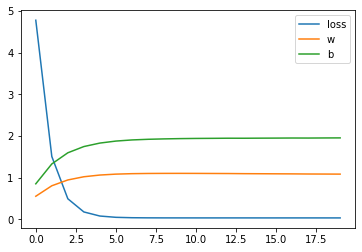

In [72]:
# Training graph
plt.plot(loss_list, label="loss")
plt.plot(w_list, label="w")
plt.plot(b_list, label="b")
plt.legend()
plt.show()

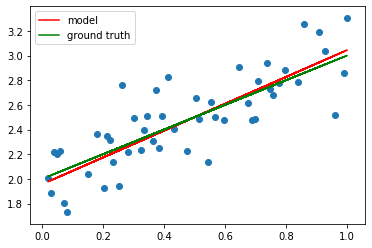

In [73]:
## 결과 확인
plt.scatter(x, y)
plt.plot(x, x * w_list[-1] + b_list[-1], label="model", c="r")
plt.plot(x, x * 1 + 2., label="ground truth", c="g")
plt.legend()
plt.show()